<a href="https://colab.research.google.com/github/binaria010/Mate2B/blob/main/Segunda%20Parte/Fourier/Clase8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa, librosa.display, librosa.feature
import IPython.display as ipd
from scipy.fft import fft, ifft


# Practica 7: Transforma de Fourier Discreta




Como ejemplo motivador consideremos una señal que sea la nota musical LA 440 y la reproducimos por un segundo. Esta nota es la función

$$
x(t) = \sin(2\pi ft) \qquad  f = 440
$$


In [2]:
L = 1 # duracion en seconds
sr = 3000 # sample rate: cuantas muestras en un segundo
num_samples = int(L*sr) # time * sample rate gives us number of samples
freq = 440
t = np.arange(0, L, 1/num_samples) # divide 0 to T into num_samples segments
LA = np.sin(2*np.pi*freq*t)
ipd.Audio(LA, rate = sr)

Consideremos una segunda señal
$$
new-note = 5x(t) + 0.5 \sin(4\pi f*t +\pi/2)
$$

In [3]:
new_note = 5*LA + 0.5*np.sin(2*np.pi*2*freq*t + np.pi/2)
ipd.Audio(new_note, rate = sr)

Y una mas donde a la nota LA le sumamos algo con una frecuencia de 8 veces la 440

$$
new-note2 = 5x(t) + 0.5 \sin(16\pi f*t +\pi/2)
$$

In [4]:
new_note2 = 5*LA + 0.5*np.sin(2*np.pi*8*freq*t + np.pi/2)
ipd.Audio(new_note2, rate = sr)

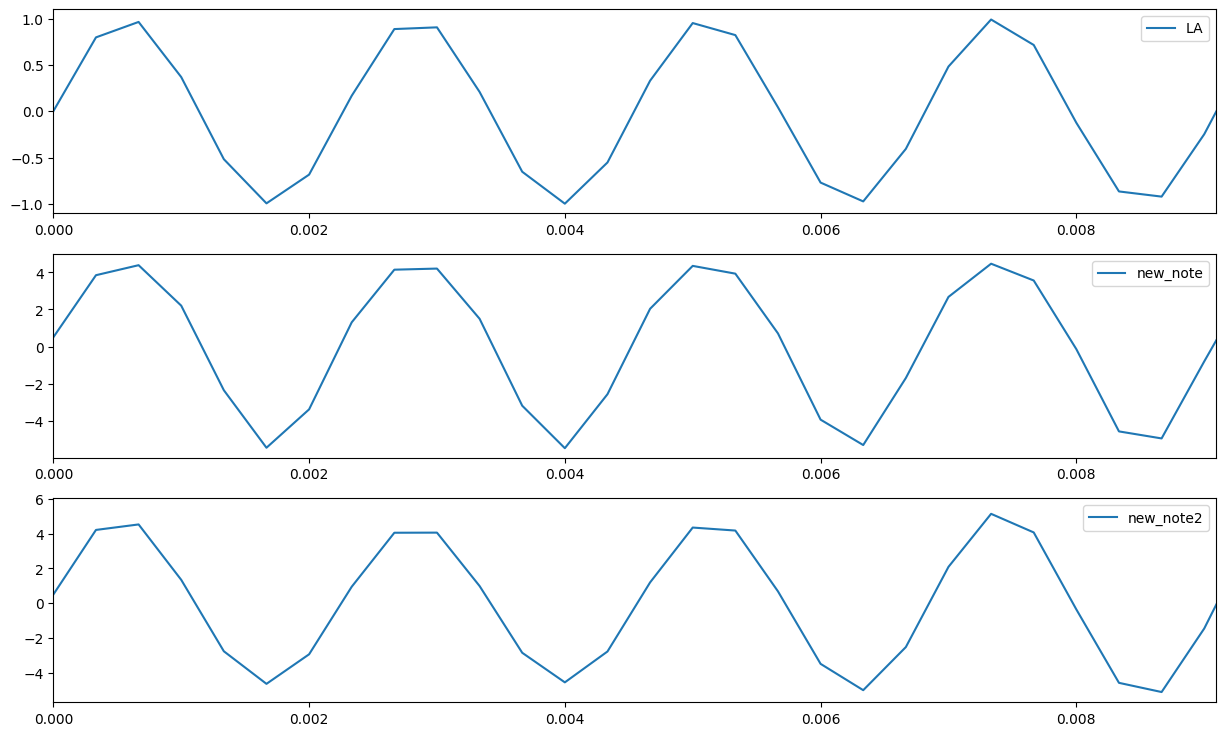

In [5]:
plt.figure(figsize = (15,9))

plt.subplot(311)
plt.plot(t[0:5000], LA[0:5000], label = "LA")
plt.xlim((0, 4/freq))
plt.legend()

plt.subplot(312)
plt.plot(t[0:5000], new_note[0:5000], label = "new_note")
plt.xlim((0, 4/freq))
plt.legend()

plt.subplot(313)
plt.plot(t[0:1000], new_note2[0:1000], label = "new_note2")
plt.xlim((0, 4/freq))
plt.legend()


plt.show()

## Polinomios trigonométricos:

Un polinmio trigonométrico es una función de la forma

$$
\sum_{k=-n}^{n}c_k e^{2\pi i kt}
$$


Las notas anteriores son todas señales periódicas que además tienen la propiedad de ser polinimios trigonométricos. Veamos que en efecto es asi:

Vamos a considerarlas todas como de períod $T=1$ aunque todas  ellas tienen período menor. Usamos además que
$$
\sin(z) = \frac{e^{iz} - e^{-iz}}{2i},\qquad \cos(z) = \frac{e^{iz} + e^{-iz}}{2}
$$

Entonces, para la nota LA:

$$
x_1(t) = \sin(2\pi*440 t) = \frac{e^{2\pi i 440 t} -e^{-2\pi i 440 t}}{2i} = -0.5i e^{2\pi i 440 t} +0.5i e^{-2\pi i 440 t]}
$$
Luego $n=440$ y los coeficientes son:

$$
c_{440} = -0.5 i, \qquad c_{-440}=0.5 i \qquad c_{k} =0 ~~ \forall k\neq 440, -440
$$
<br>
<br>

Para la nota new_note:

$$
\begin{align*}
x_2(t) = ~& 5\sin(2\pi*440 t) + 0.5 \cos(4\pi f*t) \\
& \\
= ~& \frac{e^{2\pi i 440 t} -e^{-2\pi i 440 t}}{2i} + 0.5\frac{e^{2\pi i 880 t} + e^{-2\pi i 880 t}}{2} \\
&\\
= ~& -0.5i e^{2\pi i 440 t} +0.5i e^{-2\pi i 440 t} + 0.25 e^{2\pi i 880 t} + 0.25 e^{-2\pi i 880 t}
\end{align*}
$$

entonces $n=880$ y los coeficientes no nulos son:

$$
c_{440} =-0.5i, \quad c_{-440} = 0.5i, \quad c_{880} =0.25, \quad c_{-880} = 0.25
$$

<br>
<br>

Idem para new_note2 salvo que en ese caso $n = 8*440=3520$ y los coeficientes no nulos son: $c_{440}, ~c_{-440},~ c_{3520}, ~c_{-3520}$


<br>
<br>

Veamos si esto se observa en la transformada de Fourier discreta (DFT).




---



## Ejercicio 1:

Implementemos una función en python que para una señal ya sampleada (un vector de N componentes) nos devuelva su Transformada de Fourier Discreta (DFT) que tambien es un vector de N componentes, pero estas pueden ser complejas:

Recordar que si ${\bf x} =(x_0, x_1,\dots, x_{N-1}$ entonces la componente $k$-esima de la DFT de $x$ (el coeficiente de Fourier k-esimo) es:

$$
\hat{x_k} = \frac{1}{N}\sum_{j=0}^{N-1}x_j\exp(-2\pi ijk/N) =\frac{1}{N}\sum_{j=0}^{N-1}x_j\exp(-2\pi ikt_j)\qquad \text{donde } t_j = \frac{j}{N}
$$



In [6]:
def my_DFT(x, T = 1):

  """
  Para una senial muestreada x esta funcion devuelve un array con los coeficientes de Fourier

  inputs:
  --------
  x :  numpy array de tamaño N.

  returns:
  ---------
  FTx = numpy array de tamanio N con los coeficientes de Fourier
  """

  N = len(x)

  t = np.arange(0,T, 1/N)  # grilla de los N puntos en los que esta muestreada la senial


  FTx = np.array([1/N* np.dot(x, np.exp(-2* np.pi* 1j* k*t)) for k in range(0, N)])

  return FTx

Usemos esta funcion para hallar la DFT de las notas LA y new_note. Notar que estas notas ya son funciones discretizada o muestreadas (sampleadas), por lo que son vectores de $\mathbb R^{N}$

In [7]:
print("La longitud del vector LA es : ", len(LA))
print("\nLa longitud del vector new_note es : ", len(new_note))

La longitud del vector LA es :  3000

La longitud del vector new_note es :  3000


In [8]:
FT_LA = my_DFT(LA)

In [9]:
FT_newnote = my_DFT(new_note)


HAgamso un plot de la señal en el dominio de la frecuencia, es decir, graficamos la señal transformada. En realidad como la transformada de Fourier Discreta es un vector en $\mathbb C^N$, lo que vamos a graficar es el módulo de cada componente.

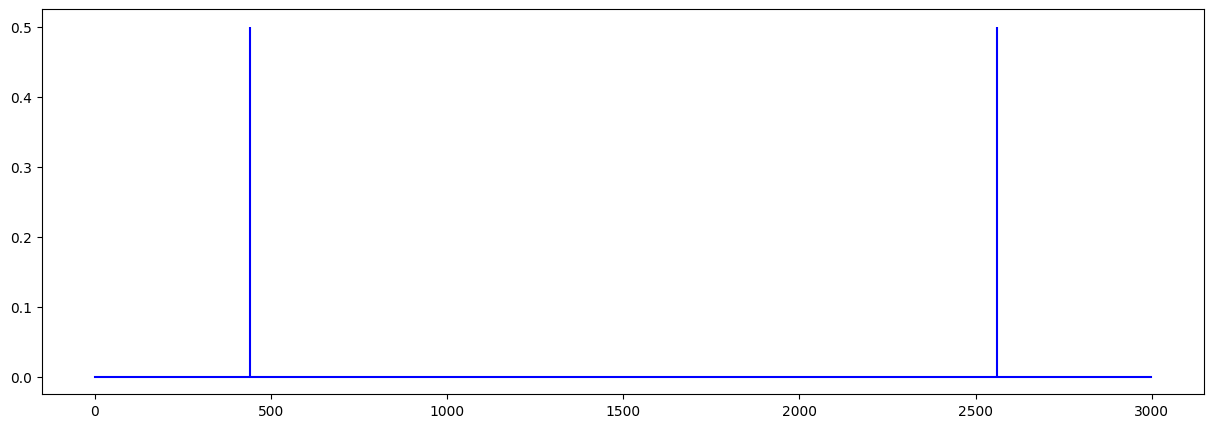

In [10]:
magnitud = np.abs(FT_LA)
N = len(magnitud)

frequency = np.arange(0, sr)  #defino una grilla de frecuencias

plt.figure(figsize = (15,5))
plt.stem(frequency, magnitud, linefmt='b', markerfmt=" ", basefmt="-b")
plt.show()

Vemos que las componentes de Fourier que son no nulas son: $\hat x_{440}$, $\hat{x}_{-440} = \hat{x}_{N - 440} $. HAgamos un zoom:

In [11]:
magnitud[438:450]

array([1.43419793e-15, 1.58276036e-14, 5.00000000e-01, 1.89841226e-14,
       2.79292720e-15, 8.54156629e-15, 2.66861902e-15, 4.78589139e-15,
       1.92590748e-15, 6.30748780e-15, 7.31926567e-15, 5.10940838e-15])

In [12]:
magnitud[2550:2561]

array([3.19225151e-15, 1.87604566e-14, 8.00324099e-15, 3.67088061e-15,
       2.09824961e-14, 1.36783639e-14, 3.89777892e-14, 3.44612291e-14,
       2.81019791e-14, 1.47949050e-13, 5.00000000e-01])

In [13]:
magnitud[2560]

0.49999999999999784

Probemos usando la funcion de scipy: scipy.fft.fft

In [14]:
fft_LA = fft(LA)/N


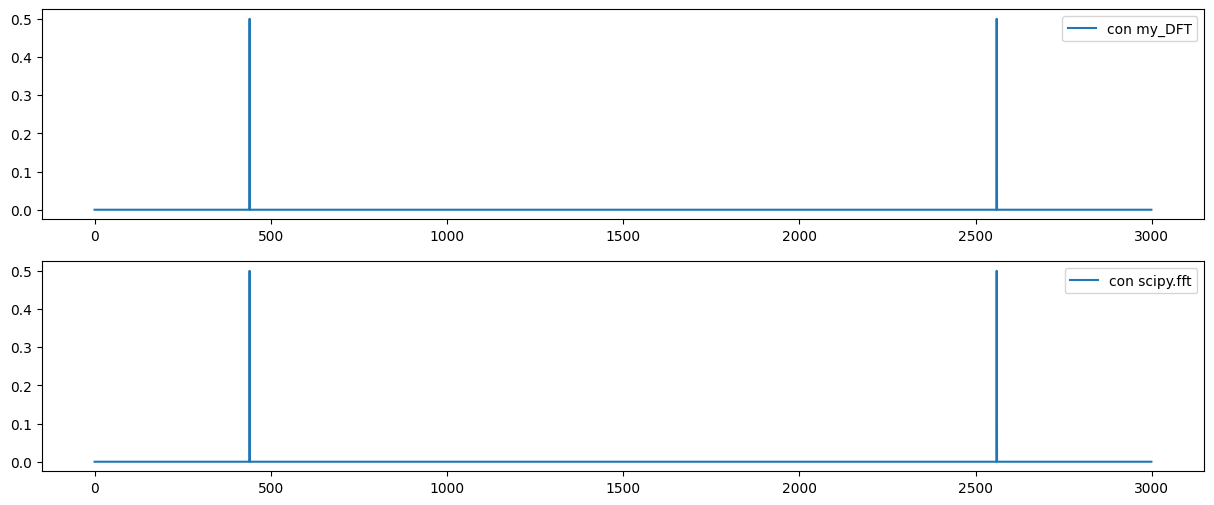

In [15]:
frequency = np.arange(0, len(magnitud))

plt.figure(figsize = (15,6))
plt.subplot(211)
plt.plot(frequency, magnitud, label = "con my_DFT")
plt.legend()
plt.subplot(212)
plt.plot(frequency, np.abs(fft_LA), label = "con scipy.fft")
plt.legend()
plt.show()

Grafiquemos ahora la DFT de new_note y verifiquemos que los coeficientes que sobreviven son

$$
\hat x_{440}, \qquad \hat{x}_{-440} = \hat{x}_{N - 440},\qquad \hat x_{880}, \qquad \hat{x}_{-880} = \hat{x}_{N -880}
$$

In [16]:
fft_newnote = fft(new_note)/N

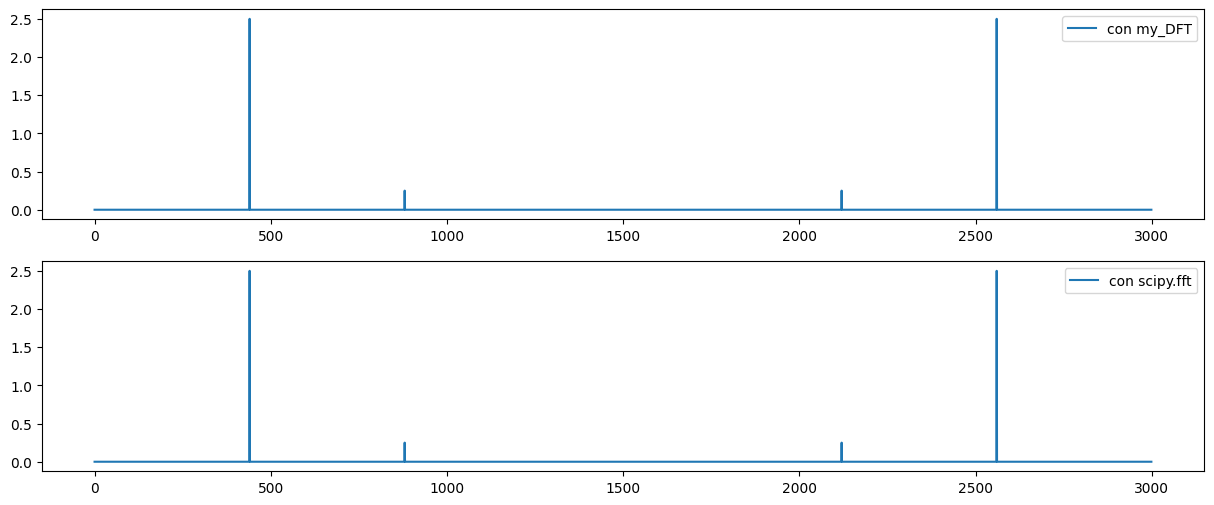

In [17]:

frequency = np.arange(0, N)

plt.figure(figsize = (15,6))
plt.subplot(211)
plt.plot(frequency, np.abs(FT_newnote), label = "con my_DFT")
plt.legend()
plt.subplot(212)
plt.plot(frequency, np.abs(fft_newnote), label = "con scipy.fft")
plt.legend()
plt.show()



---



---



---



## Ejercicio:

Considerar las señales 1-periodicas dadas por $x(t)= 1+\sin(2\pi t)$ e $y(t)= 1+\sin(16\pi t)$

1. Sin hacer cuentas determinar el valor de $n$ y de los coeficientes de Fourier en cada caso.

2. En un mismo gr\'afico graficar $x(t)$ e $y(t)$. Usando el programa del ejercicio anterior calcular $\widehat{\textbf{x}}$ y $\widehat{\textbf{y}}$ considerando $N=7$. ¿Qu\'e se observa? (*este fenómeno se conoce como solapamiento*).

3. Repetir el item anterior para $N = 14$. ¿Se puede asegurar que los vectores $\widehat{\textbf{x}}$ y $\widehat{\textbf{y}}$ contienen la informaci\'on necesaria para obtener los coeficientes de Fourier de $x(t)$ e $y(t)$?.

Para esto, implementemos una función que reciba como inputs una funci´øn, su período y la cantidad de puntos en los que la vamos a samplear

In [18]:
def my_DFT2(f, T, N):

    """
    Para una senial f de periodo T,  esta funcion devuelve un array con los coeficientes de Fourier

    inputs:
    --------
    f :  objeto función de python
    T : float. Periodo de f
    N : int. Entero que indica en cuantos puntos sampleamos la función f para obtener su DFT.

    returns:
    ---------
    FTx = numpy array de tamanio N con los coeficientes de Fourier
    """

    t = np.arange(0,T, 1/N)
    f_sample = f(t)    # me devuelve la funcion muestreada en los N puntos de la grilla t

    DFT_f = my_DFT(f_sample)

    return DFT_f



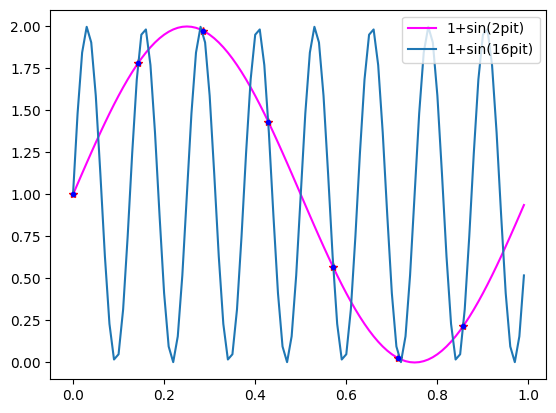

In [19]:
X = lambda t: 1 +np.sin(2*np.pi*t)
Y = lambda t: 1 +np.sin(16*np.pi*t)

N = 7
points = np.arange(0, 1, 1/N)
grilla = np.arange(0, 1, 1/100)

plt.plot(grilla, X(grilla), label ="1+sin(2pit)", color = "magenta")
plt.plot(points, X(points), "*", color = "r")
plt.plot(grilla, Y(grilla), label ="1+sin(16pit)")
plt.plot(points, Y(points), ".", color = "b")
plt.legend()
plt.show()


In [20]:
T = 1
N =7

DFT_X = my_DFT2(X, T, N)
DFT_Y = my_DFT2(Y, T, N)

In [21]:
def plot_f_and_fft(f, fft,T):

  N = len(fft)
  freq = np.arange(N)/T

  t = np.arange(0,T, 1/N)
  grilla = np.linspace(0, T, 1000)

  plt.figure(figsize=(15,6))
  plt.subplot(211)
  plt.stem(freq, np.abs(fft), linefmt='b', markerfmt=" ", basefmt="-b")
  plt.title("DFT de f ")

  plt.subplot(212)
  plt.plot(t, f(t),".", label = "puntos muestreados")
  plt.plot(grilla, f(grilla))
  plt.title("funcion sampleada en "+ str(N) + " puntos")

  plt.show()

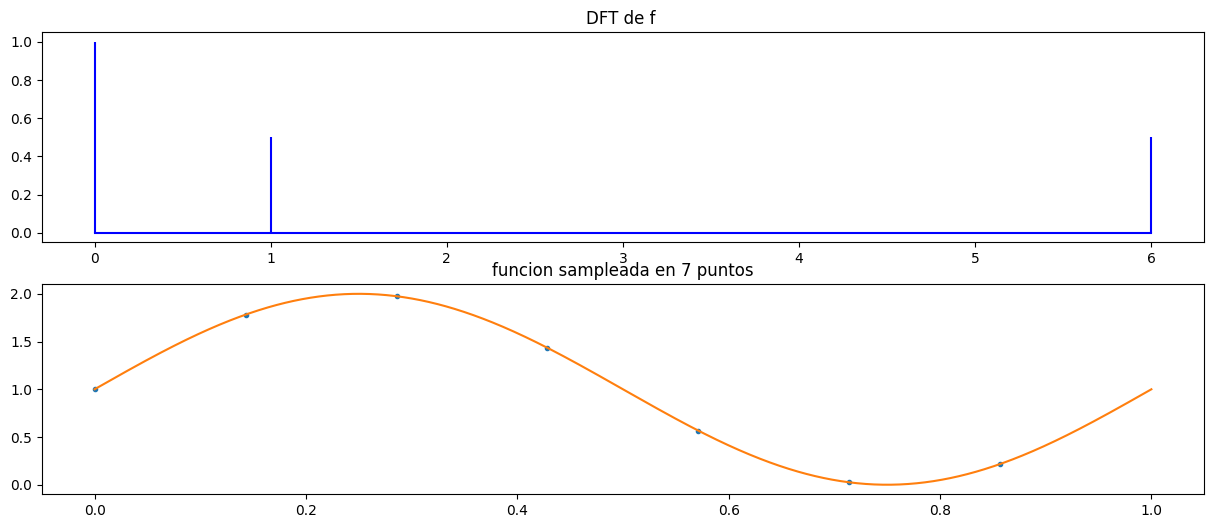

In [22]:
plot_f_and_fft(X, DFT_X, T=1)

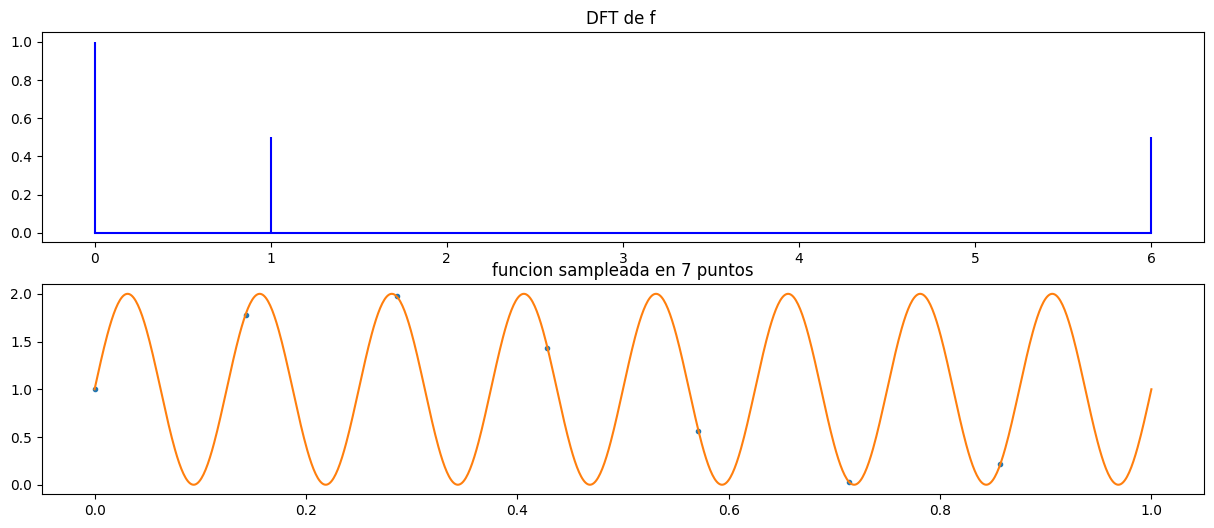

In [23]:
plot_f_and_fft(Y, DFT_Y, T=1)

Si ahora cconsideramos N=14:

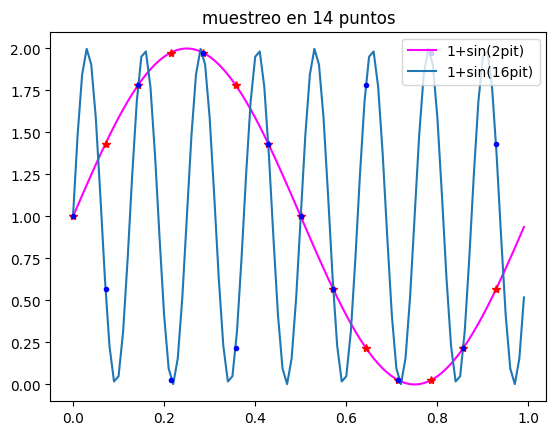

In [24]:
N = 14
points = np.arange(0, 1, 1/N)
grilla = np.arange(0, 1, 1/100)

plt.plot(grilla, X(grilla), label ="1+sin(2pit)", color = "magenta")
plt.plot(points, X(points), "*", color = "r")
plt.plot(grilla, Y(grilla), label ="1+sin(16pit)")
plt.plot(points, Y(points), ".", color = "b")
plt.title("muestreo en " + str(N) +" puntos")
plt.legend()
plt.show()

In [25]:
DFT_X = my_DFT2(X, T=1, N = 14)
DFT_Y = my_DFT2(Y, T=1, N = 14)

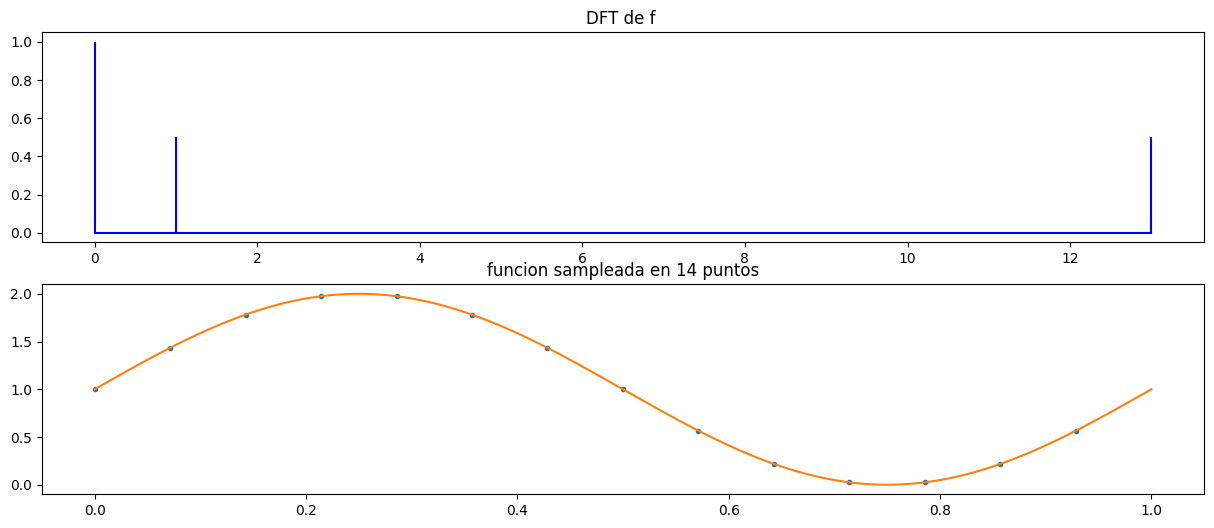

In [26]:
plot_f_and_fft(X, DFT_X, T=1)

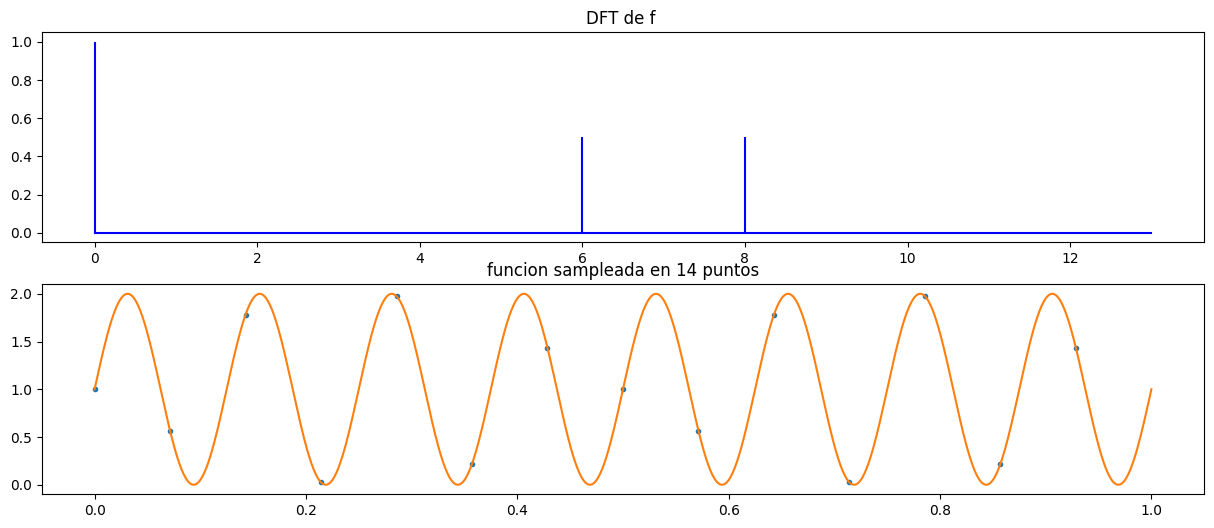

In [27]:
plot_f_and_fft(Y, DFT_Y, T=1)

Con este ejemplo queremos ilustrar lo siguiente:

Dadas dos señales distintas, si estas no se muestrean lo suficientemente fino pueden tener la misma DFT, esto es un problema si uno quiere recuperar una señal a partir de su DFT. Asi en el caso del item a) si queremos reconstruir la señal $Y$ a partir de su DFT (la obtenida habiendo muestreado en N=7 puntos) entonces vamos a reconstruir $X$ en lugar de $Y$ y claramente ambas señales son distintas.



---



---



---



Comentario sobre el ejercicio 5 de la práctica:
Para que el ejercicio salga usando las funciones implementadas aquí, donde hemos supuesto que la funci´øn está definida en [0,1] y este patrón se repite periódicamente hay que definir la función de la siguiente forma:

$$
f(t)= \begin{cases} 1- 4t &\qquad \text{si } t\in [0, 0.5)\\
47 -3  &\qquad\text{si } t\in[0.5,1]
\end{cases}
$$

EL codigo de abajo puede llegar a ser util para su solución

In [27]:
X = lambda t: (t<= 0.5)*(-4*t +1) + (t>0.5)*(4*t -3)

coefs = lambda k: (2*(1- (-1)**k))/(np.pi**2 * k**2)

print("c1, c7, c_{-3} son:", coefs(1), coefs(7), coefs(-3))
T = 1

for N in [2**4, 2**10, 2**14]:
  t = np.arange(0, T, 1/N)
  x = X(t)
  DFT_x = scipy.fft.fft(x)/N
  print("Para N = "+ str(N) + " los coefs 1, 7 y -3 son: ", [DFT_x[[1, 7, N-3]]])
  plot_f_and_fft(X, DFT_x, T)